# Main Simulation Loop Construction

Develop the main simulation loop for the formation model

01/05/2023

Andrew Weng

In [13]:
import os, sys

# Move the path up a level to be able to index into source files
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import pandas as pd
import numpy as np
from src import cellsim as cellsim 

%matplotlib widget
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%autoreload

chg_current_amps = +0.5
dch_current_amps = -0.5
current_cv_cut_amps = 0.5 / 20
sim_time_s = 150*3600

cell = cellsim.Cell()
sim = cellsim.Simulation(cell, sim_time_s)

mode = 'cc_charge'
cycle_number = 1

print(f'Simulating Cycle {cycle_number}...')

for k in range(0, len(sim.t) - 1):

    # Initial rest step
    if sim.t[k] < 10*3600:
        sim.step(k, 'cc', icc=0, cyc_num=cycle_number,
                 step_num=3) 
        continue

    # Final rest step
    if cycle_number > 3:
        sim.step(k, 'cc', icc=0, cyc_num=cycle_number,
                 step_num=3) 
        continue

    elif mode == 'cc_charge':

        sim.step(k, 'cc', icc=chg_current_amps, cyc_num=cycle_number,
                 step_num=0) 

        # Check for constant voltage condition
        if sim.vt[k+1] >= sim.vmax:
            print('Switching from CC charge to CV charge...')
            mode = 'cv_charge'
            sim.vt[k+1] = sim.vmax
            continue
        
    elif mode == 'cv_charge':

        sim.step(k, 'cv', 
                 icv=current_cv_cut_amps, 
                 cyc_num=cycle_number,
                 step_num=1)

        if np.abs( sim.i_app[k] ) < np.abs( current_cv_cut_amps ):
            print('Switching from CV charge to CC discharge...')
            mode = 'cc_discharge'
            continue

    elif mode == 'cc_discharge':

        sim.step(k, 'cc', 
                 icc=dch_current_amps, 
                 cyc_num=cycle_number,
                 step_num=2)
        
        if sim.vt[k+1] <= sim.vmin: 
           mode = 'cc_charge'
           cycle_number += 1
           print(f'Simulating Cycle {cycle_number}...')
           continue

print('Done.')


Simulating Cycle 1...
Switching from CC charge to CV charge...
Switching from CV charge to CC discharge...
Simulating Cycle 2...
Switching from CC charge to CV charge...
Switching from CV charge to CC discharge...
Simulating Cycle 3...
Switching from CC charge to CV charge...
Switching from CV charge to CC discharge...
Simulating Cycle 4...
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest step.
Simulating rest ste

# Make the plot

/Users/aweng/code/formation-modeling/src/cellsim.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


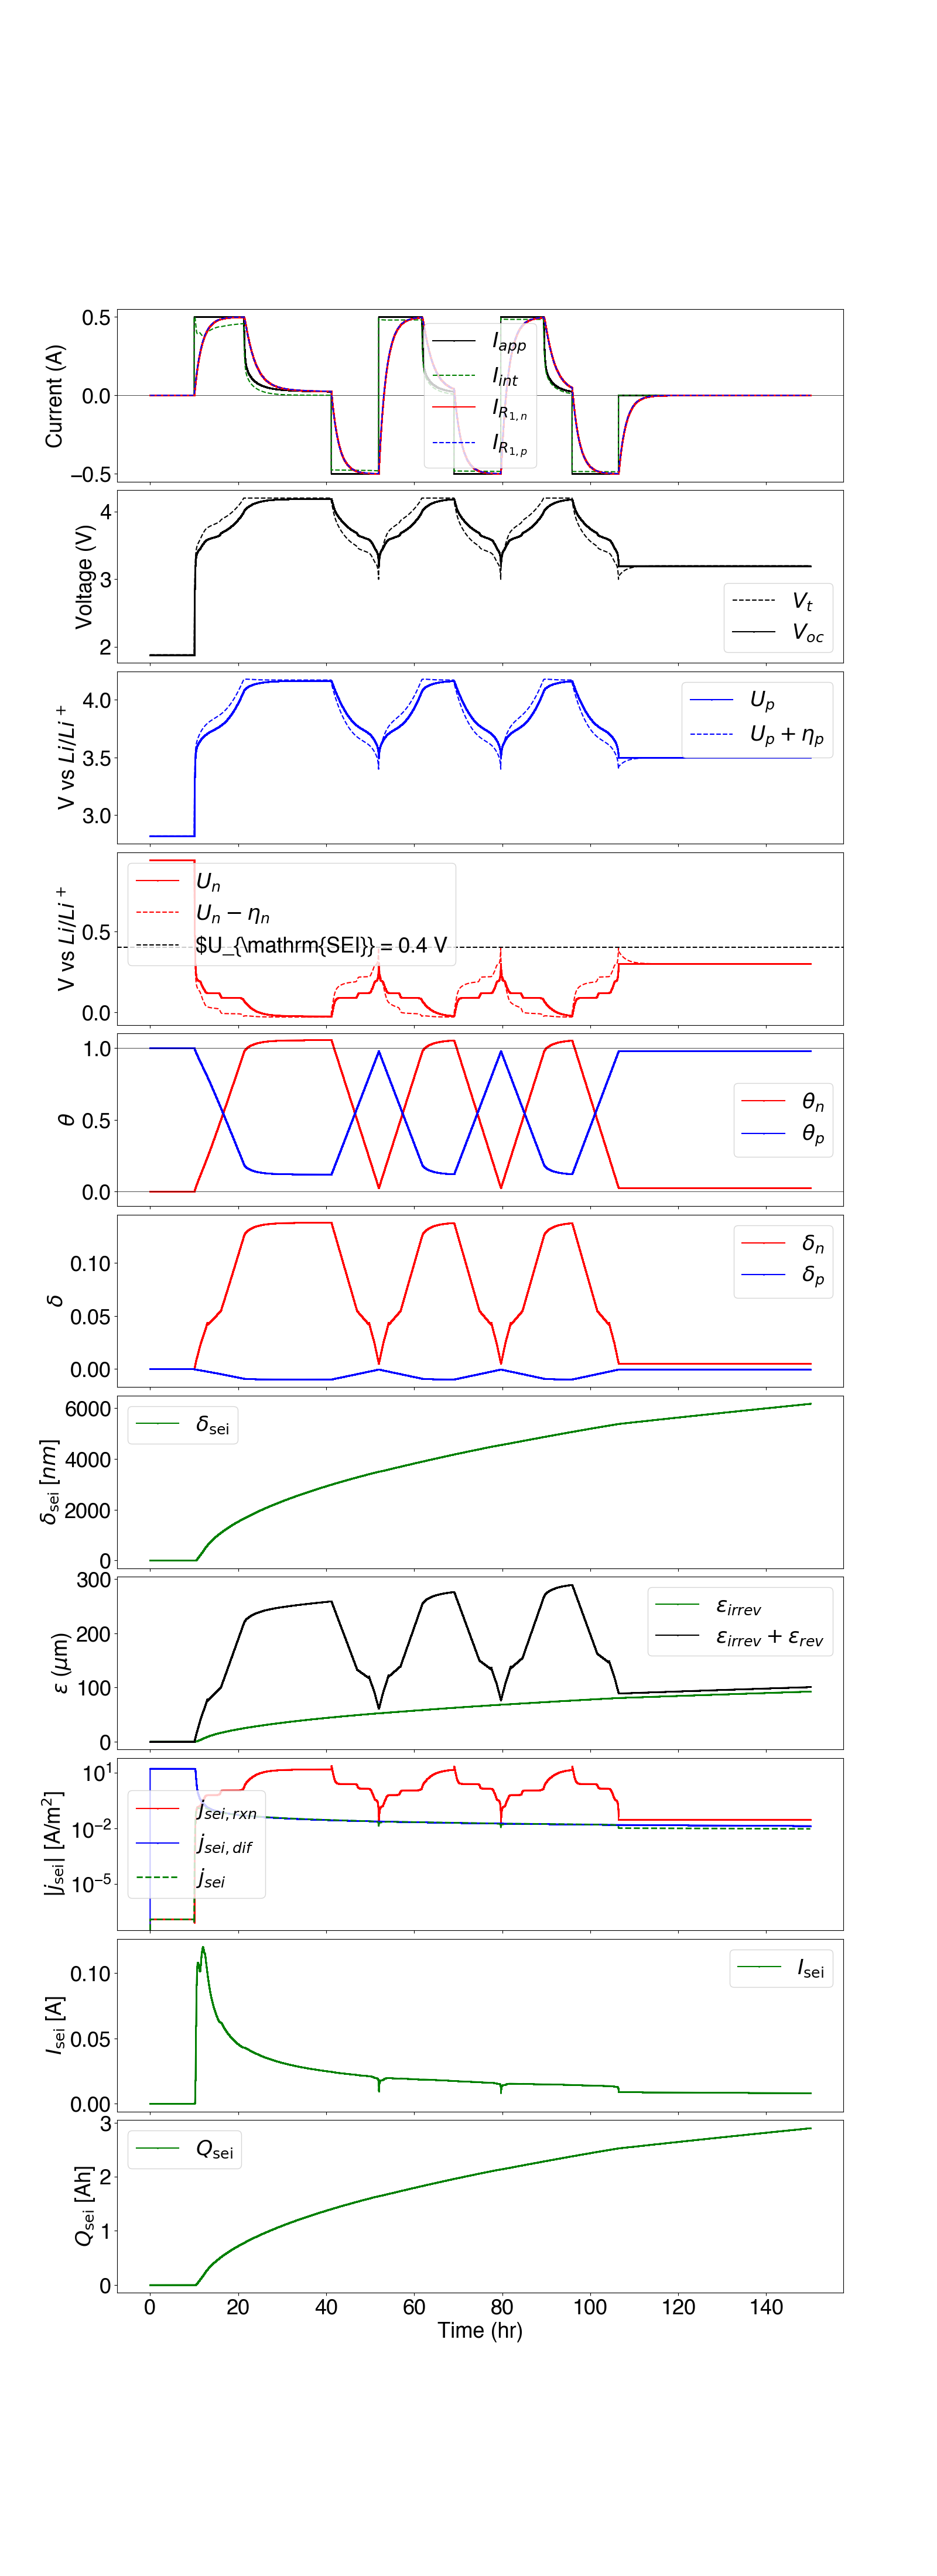

In [15]:
%autoreload
sim.plot()

In [16]:
df = pd.DataFrame(sim.__dict__)
df

cell   dt         t  vmax  vmin  \
0       <src.cellsim.Cell object at 0x122931430>  1.0       0.0   4.2   3.0   
1       <src.cellsim.Cell object at 0x122931430>  1.0       1.0   4.2   3.0   
2       <src.cellsim.Cell object at 0x122931430>  1.0       2.0   4.2   3.0   
3       <src.cellsim.Cell object at 0x122931430>  1.0       3.0   4.2   3.0   
4       <src.cellsim.Cell object at 0x122931430>  1.0       4.0   4.2   3.0   
...                                          ...  ...       ...   ...   ...   
539995  <src.cellsim.Cell object at 0x122931430>  1.0  539995.0   4.2   3.0   
539996  <src.cellsim.Cell object at 0x122931430>  1.0  539996.0   4.2   3.0   
539997  <src.cellsim.Cell object at 0x122931430>  1.0  539997.0   4.2   3.0   
539998  <src.cellsim.Cell object at 0x122931430>  1.0  539998.0   4.2   3.0   
539999  <src.cellsim.Cell object at 0x122931430>  1.0  539999.0   4.2   3.0   

         i_cv  i_app  cycle_number  step_number   theta_n  ...     j_sei_rxn  \
0       0.025    0.0           1.0          3.0  0.000000  ...  0.000000e+00   
1       0.025    0.0           1.0          3.0  0.000000  ...  1.279502e-07   
2       0.025    0.0           1.0          3.0  0.000000  ...  1.279502e-07   
3       0.025    0.0           1.0          3.0  0.000000  ...  1.279502e-07   
4       0.025    0.0           1.0          3.0  0.000000  ...  1.279502e-07   
...       ...    ...           ...          ...       ...  ...           ...   
539995  0.025    0.0           4.0          3.0  0.026044  ...  3.094804e-02   
539996  0.025    0.0           4.0          3.0  0.026044  ...  3.094804e-02   
539997  0.025    0.0           4.0          3.0  0.026044  ...  3.094804e-02   
539998  0.025    0.0           4.0          3.0  0.026044  ...  3.094804e-02   
539999  0.025    0.0           0.0          0.0  0.026044  ...  3.094804e-02   

        j_sei_dif         j_sei         i_sei         q_sei     delta_sei  \
0        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  5.000000e-09   
1       17.525596 -1.279502e-07  1.074782e-07  2.985505e-11  5.000000e-09   
2       17.525596 -1.279502e-07  1.074782e-07  5.971010e-11  5.000000e-09   
3       17.525595 -1.279502e-07  1.074782e-07  8.956514e-11  5.000000e-09   
4       17.525595 -1.279502e-07  1.074782e-07  1.194202e-10  5.000000e-09   
...           ...           ...           ...           ...           ...   
539995   0.014185 -9.726539e-03  8.170293e-03  2.899693e+00  6.177713e-06   
539996   0.014185 -9.726534e-03  8.170288e-03  2.899696e+00  6.177718e-06   
539997   0.014185 -9.726528e-03  8.170284e-03  2.899698e+00  6.177723e-06   
539998   0.014185 -9.726523e-03  8.170280e-03  2.899700e+00  6.177728e-06   
539999   0.014184 -9.726518e-03  8.170275e-03  2.899702e+00  6.177733e-06   

         delta_n   delta_p  expansion_rev  expansion_irrev  
0       0.000000 -0.000000       0.000000     0.000000e+00  
1       0.000000 -0.000000       0.000000     7.500000e-08  
2       0.000000 -0.000000       0.000000     7.500000e-08  
3       0.000000 -0.000000       0.000000     7.500000e-08  
4       0.000000 -0.000000       0.000000     7.500000e-08  
...          ...       ...            ...              ...  
539995  0.005209 -0.000239       0.000008     9.266570e-05  
539996  0.005209 -0.000239       0.000008     9.266577e-05  
539997  0.005209 -0.000239       0.000008     9.266584e-05  
539998  0.005209 -0.000239       0.000008     9.266592e-05  
539999  0.005209 -0.000239       0.000008     9.266599e-05  

[540000 rows x 31 columns]

# Calculate cycle-by-cycle metrics

In [17]:
df = pd.DataFrame(sim.__dict__)
df['dq'] = np.abs(df['dt'] * df['i_app'] / 3600)
df_agg = df.groupby(['cycle_number', 'step_number'])['dq'].agg('sum')
df_agg

cycle_number  step_number
0.0           0.0            0.000000
1.0           0.0            5.624306
              1.0            1.057414
              2.0            5.385972
              3.0            0.000000
2.0           0.0            4.905139
              1.0            0.550301
              2.0            5.312222
3.0           0.0            4.865556
              1.0            0.507792
              2.0            5.277917
4.0           3.0            0.000000
Name: dq, dtype: float64

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.manager.handle_json(content)


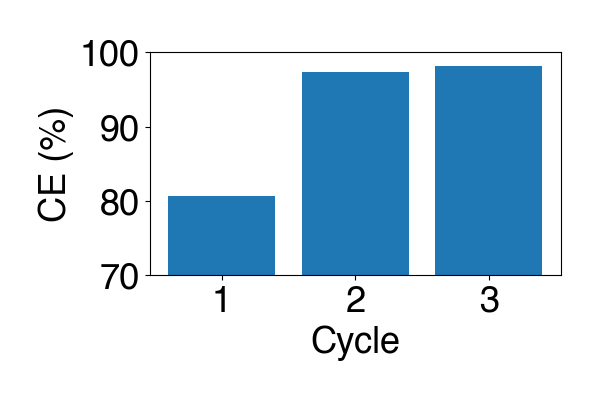

In [18]:
from matplotlib import pyplot as plt

ce = []
cycle_index = np.array([1, 2, 3])

for i in cycle_index:
    ce.append(df_agg[i][2] / (df_agg[i][0] + df_agg[i][1]))

ce = np.array(ce)

plt.figure(figsize=(6, 4))
plt.bar(cycle_index, ce*100)
plt.ylabel('CE (%)')
plt.grid(False)
plt.xlabel('Cycle')
plt.ylim([70, 100])
plt.show()
